# Project 1

In this Notebook, I will plot a kMeans cluster using the famous Iris data.

In [58]:
# load packages for unsupervised learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [59]:
# load iris data from pandas
df = pd.read_csv('iris.csv')

In [60]:
# check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
# make Variety as categorical variable
df['variety'] = df['variety'].astype('category')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [62]:
# set seed
np.random.seed(123)

In [63]:
# Create a kMeans model with 3 clusters: model
model = KMeans(n_clusters=3)


In [64]:
points = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
model.fit(points)

d:\Anaconda\envs\envUL\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [65]:
new_points = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
label = model.predict(new_points)

In [66]:
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Ploting kMeans - Cluster Centers

In [67]:
# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,2]

In [68]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_


In [69]:
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]

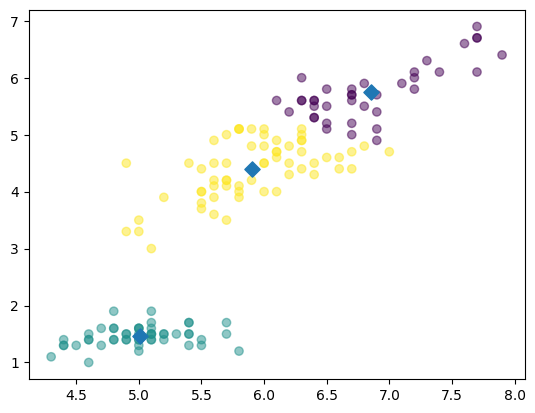

In [70]:
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=label, alpha=0.5)
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y, marker='D', s=60)
plt.show()

## Evaluating quality of cluster

### Cross tabulation

In [71]:
df_2 = pd.DataFrame({'labels': label, 'varieties': df['variety']})
df_2

,labels,varieties
0,1,Setosa
1,1,Setosa
2,1,Setosa
3,1,Setosa
4,1,Setosa
...,...,...
145,0,Virginica
146,2,Virginica
147,0,Virginica
148,0,Virginica


In [72]:
pd.crosstab(df_2['labels'], df_2['varieties'])

varieties,Setosa,Versicolor,Virginica
labels,,,
0,0,2,36
1,50,0,0
2,0,48,14


### Measuring clutering quality

* A good clustering has low inertia -- tight clustering
* But not many cluster
* Choose an 'elbow' in the inertia plot -- ie when inertia starts decreasing more slowly

In [73]:
print(model.inertia_)

78.85144142614601


In [74]:
# upload df_3 for seed.csv
df_3 = pd.read_csv('seeds.csv')
df_3.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [75]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_3)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    

d:\Anaconda\envs\envUL\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\envs\envUL\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\envs\envUL\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Anaconda\envs\envUL\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

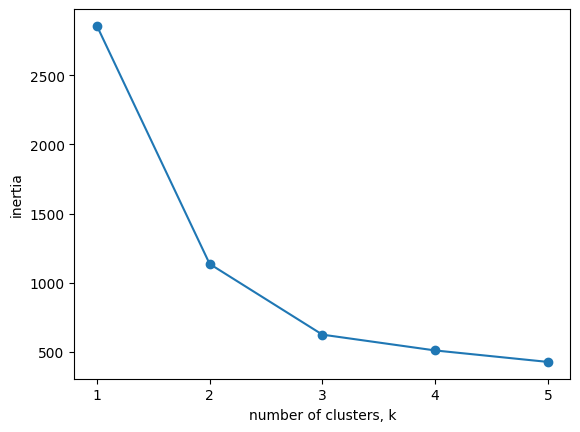

In [76]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


## Transforming features for better clusterings

In [77]:
# read wine.csv as wine
wine = pd.read_csv('wine.csv')
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [78]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class_label           178 non-null    int64  
 1   class_name            178 non-null    object 
 2   alcohol               178 non-null    float64
 3   malic_acid            178 non-null    float64
 4   ash                   178 non-null    float64
 5   alcalinity_of_ash     178 non-null    float64
 6   magnesium             178 non-null    int64  
 7   total_phenols         178 non-null    float64
 8   flavanoids            178 non-null    float64
 9   nonflavanoid_phenols  178 non-null    float64
 10  proanthocyanins       178 non-null    float64
 11  color_intensity       178 non-null    float64
 12  hue                   178 non-null    float64
 13  od280                 178 non-null    float64
 14  proline               178 non-null    int64  
dtypes: float64(11), int64(3

In [79]:
df_wine = pd.DataFrame({'labels':wine['class_label'], 'varieties': wine['class_name']})
ct_wine = pd.crosstab(df_wine['labels'], df_wine['varieties'])
ct_wine

varieties,Barbera,Barolo,Grignolino
labels,,,
1,0,59,0
2,0,0,71
3,48,0,0


In [80]:
# Calculate variances for each class
variances = {}
for class_name in ct_wine.columns:
    counts = ct_wine[class_name]
    mean = counts.mean()
    variance = ((counts - mean) ** 2).mean()
    variances[class_name] = variance

# Print out the variances
for class_name, variance in variances.items():
    print(f"Variance for {class_name}: {variance:.2f}")

Variance for Barbera: 512.00
Variance for Barolo: 773.56
Variance for Grignolino: 1120.22


## Variances are too high

* Feature variance = feature influence

### Method 1

In [81]:
from sklearn.preprocessing import StandardScaler

# Extract the numeric columns (excluding 'class_name') from the wine DataFrame
numeric_columns = wine.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame containing only the numeric columns
numeric_data = wine[numeric_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numeric data
scaler.fit_transform(numeric_data)

StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(numeric_data)

### Method 2

In [82]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
KMeans = KMeans(n_clusters=3)

In [83]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, KMeans)
pipeline.fit(numeric_data)

d:\Anaconda\envs\envUL\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [84]:
labels = pipeline.predict(numeric_data)

In [86]:
# Cross-tabulation of labels and varieties with standardization
df = pd.DataFrame({'labels': labels, 'varieties': wine['class_name']})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Barbera,Barolo,Grignolino
labels,,,
0,0,59,2
1,48,0,1
2,0,0,68


## Visualizing hierarchies